<a href="https://colab.research.google.com/github/sonalisanjeevprabu18/Neural-Network-and-Deep-Learning/blob/main/MNIST_2digit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7750 - loss: 0.8442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9064 - loss: 0.3166
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9139 - loss: 0.2971
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9178 - loss: 0.2799
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9252 - loss: 0.2584

-----------------------------
Image Index: 5872
Actual Label: 1
Predicted Label: 1


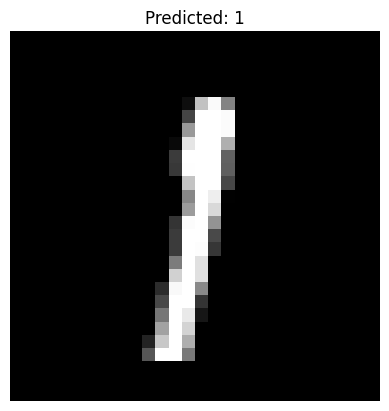


-----------------------------
Image Index: 4968
Actual Label: 9
Predicted Label: 9


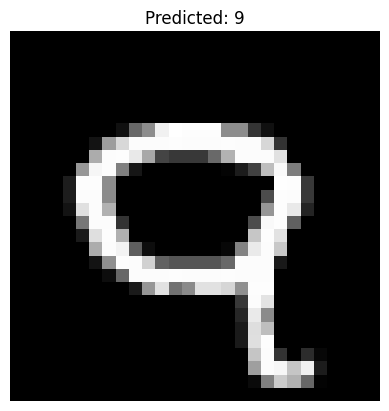

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
# 1. LOAD MNIST DATA
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot (needed for categorical_crossentropy)
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# 2. BUILD MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# 3. COMPILE MODEL with updated optimizer and loss
model.compile(
    optimizer='sgd',                           # changed optimizer
    loss='categorical_crossentropy',           # changed loss
    metrics=['accuracy']
)

# 4. TRAIN MODEL (epochs increased to 5)
print("Training model...")
model.fit(x_train, y_train_oh, epochs=5, verbose=1)

# 5. PICK 2 RANDOM TEST IMAGES
indices = random.sample(range(len(x_test)), 2)

for idx in indices:
    img = x_test[idx]
    label = y_test[idx]
    # Prepare for prediction
    input_img = img.reshape(1, 28, 28, 1)
    # Predict
    prediction = np.argmax(model.predict(input_img, verbose=0))
    # Print results
    print("\n-----------------------------")
    print("Image Index:", idx)
    print("Actual Label:", label)
    print("Predicted Label:", prediction)
    # Show image
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {prediction}")
    plt.axis('off')
    plt.show()


Training model...
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.7672 - loss: 0.8781
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9058 - loss: 0.3238
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9144 - loss: 0.2944
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9215 - loss: 0.2688
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9316 - loss: 0.2436

===== TWO DIGIT PREDICTION =====
Actual Left Digit:  8
Predicted Left Digit: 8
--------------------------------
Actual Right Digit: 9
Predicted Right Digit: 9



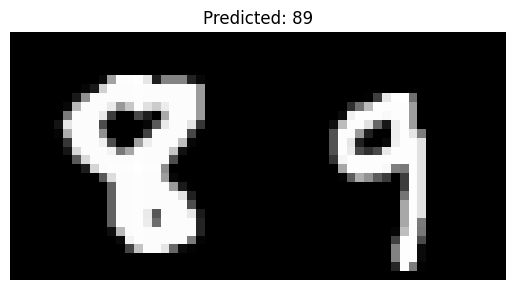

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

# 1. LOAD MNIST DATA
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize and reshape images
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0

# Convert labels to one-hot encoding
y_train_oh = tf.keras.utils.to_categorical(y_train, 10)
y_test_oh = tf.keras.utils.to_categorical(y_test, 10)

# 2. BUILD A SIMPLE CNN MODEL
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(
    optimizer='sgd',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train model
print("Training model...")
model.fit(x_train, y_train_oh, epochs=5, verbose=1)

# 3. SELECT TWO RANDOM IMAGES
idx1, idx2 = random.sample(range(len(x_test)), 2)

img1 = x_test[idx1].reshape(28, 28)        # First digit image
img2 = x_test[idx2].reshape(28, 28)        # Second digit image

# Combine them horizontally → creates a 2-digit input
combined_img = np.hstack((img1, img2))

# 4. SPLIT THE COMBINED IMAGE FOR PREDICTION
left_digit = combined_img[:, :28]   # First 28 columns → left digit
right_digit = combined_img[:, 28:]  # Last 28 columns → right digit

# Prepare each digit for prediction
left_input = left_digit.reshape(1, 28, 28, 1)
right_input = right_digit.reshape(1, 28, 28, 1)

# 5. PREDICT BOTH DIGITS
pred_left = np.argmax(model.predict(left_input, verbose=0))
pred_right = np.argmax(model.predict(right_input, verbose=0))

# 6. SHOW RESULTS
print("\n===== TWO DIGIT PREDICTION =====")
print("Actual Left Digit: ", y_test[idx1])
print("Predicted Left Digit:", pred_left)
print("--------------------------------")
print("Actual Right Digit:", y_test[idx2])
print("Predicted Right Digit:", pred_right)
print("================================\n")

# 7. DISPLAY THE COMBINED 2-DIGIT IMAGE
plt.imshow(combined_img, cmap='gray')
plt.title(f"Predicted: {pred_left}{pred_right}")
plt.axis('off')
plt.show()
